In [ ]:
!kaggle -v

Kaggle API 1.7.4.5


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"namluu138","key":"e2cbfa3b15816de9cf68bcf0c6f498d9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle -v
!kaggle datasets list


Kaggle API 1.7.4.5
ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                         Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        263  1.0              
suvidyasonawane/student-academic-placement-performance-dataset   Student Academic Placement Performance Dataset           94469  2026-01-11 02:02:47.837000              0         23  1.0              
kundanbedmutha/exam-score-prediction-dataset                     Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863       

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
!kaggle datasets download -d namluu138/xstk-kh -p /content --unzip


print('Data source import complete.')


Dataset URL: https://www.kaggle.com/datasets/namluu138/xstk-kh
License(s): unknown
  0% 0.00/116k [00:00<?, ?B/s]
100% 116k/116k [00:00<00:00, 167MB/s]
Data source import complete.


In [ ]:
!nvidia-smi
!getent hosts huggingface.co || true


Tue Jan 13 13:34:55 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip -q uninstall -y torch torchvision torchaudio triton bitsandbytes torchao || true
!pip -q cache purge


In [ ]:
!pip -q uninstall -y numpy || true
!rm -rf /usr/local/lib/python3.12/dist-packages/~umpy* || true
!rm -rf /usr/local/lib/python3.12/dist-packages/numpy* || true
!pip -q cache purge


In [ ]:
# torch cu121
!pip -q install --no-cache-dir \
  torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 \
  --index-url https://download.pytorch.org/whl/cu121

# pin numpy/pandas/sklearn đúng cho trl + colab
!pip -q install --no-cache-dir \
  "numpy==1.26.4" "pandas==2.2.2" "scikit-learn==1.4.2"

# qlora stack
!pip -q install --no-cache-dir \
  "transformers==4.45.2" \
  "accelerate==0.34.2" \
  "datasets==2.21.0" \
  "peft==0.13.2" \
  "trl==0.9.6" \
  "bitsandbytes==0.43.3" \
  "sentencepiece==0.2.0" \
  "sacrebleu==2.4.3" \
  "huggingface_hub==0.24.6" \
  "triton==2.2.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 210.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
trl 0.9.6 requires numpy<2.0.0,>=1.18.2, but you have numpy 2.3.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.5 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
gradio 5.50.0 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.24.6 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
numba 0.60.0 re

In [ ]:
import os, torch, importlib.metadata as md

# Chặn torchao
os.environ["TRANSFORMERS_NO_TORCHAO"] = "1"

print("torch:", torch.__version__, "cuda:", torch.version.cuda)
print("cuda available:", torch.cuda.is_available())
print("gpu:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else None)

for pkg in ["transformers","accelerate","datasets","peft","trl","bitsandbytes","sacrebleu"]:
    try:
        print(pkg, md.version(pkg))
    except:
        print(pkg, "NOT INSTALLED")

# đảm bảo torchao không tồn tại
try:
    print("torchao:", md.version("torchao"))
    raise RuntimeError("torchao còn tồn tại -> chạy: !pip uninstall -y torchao và restart")
except:
    print("torchao: NOT INSTALLED ")


torch: 2.2.2+cu121 cuda: 12.1
cuda available: True
gpu: Tesla T4
transformers 4.45.2
accelerate 0.34.2
datasets 2.21.0
peft 0.13.2
trl 0.9.6
bitsandbytes 0.43.3
sacrebleu 2.4.3
torchao: NOT INSTALLED 


In [ ]:
# chay tren kaggle
# from kaggle_secrets import UserSecretsClient
# HF_TOKEN = UserSecretsClient().get_secret("LuuNhatNam")
# print("HF_TOKEN loaded ")

# from transformers import AutoTokenizer
# MODEL_NAME = "meta-llama/Meta-Llama-3.1-8B-Instruct"

# _ = AutoTokenizer.from_pretrained(MODEL_NAME, token=HF_TOKEN, use_fast=True)
# print("LLaMA access OK")


In [ ]:
from google.colab import userdata
HF_TOKEN = userdata.get("LuuNhatNam")
print("HF_TOKEN loaded:", HF_TOKEN is not None)


HF_TOKEN loaded: True


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_dataset

# DATA_PATH = "/kaggle/input/xstk-kh/All_Datasets_utf8.csv" - tren kaggle

DATA_PATH = "All_Datasets_utf8.csv" # tren colab
df = pd.read_csv(DATA_PATH)

# robust: đảm bảo đúng tên cột
required = ["Instruction","Latex Input","Response"]
for c in required:
    if c not in df.columns:
        raise ValueError(f"Thiếu cột {c}. Cột hiện có: {list(df.columns)}")

df = df.dropna(subset=required).copy()
df["instruction"] = df["Instruction"].astype(str)
df["problem"] = df["Latex Input"].astype(str)
df["target"] = df["Response"].astype(str)

print("Total samples:", len(df))

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_df = train_df[["instruction","problem","target"]]
valid_df = valid_df[["instruction","problem","target"]]
test_df  = test_df[["instruction","problem","target"]]

train_df.to_json("train.jsonl", orient="records", lines=True, force_ascii=False)
valid_df.to_json("valid.jsonl", orient="records", lines=True, force_ascii=False)
test_df.to_json("test.jsonl",  orient="records", lines=True, force_ascii=False)

dataset = load_dataset("json", data_files={"train":"train.jsonl","validation":"valid.jsonl","test":"test.jsonl"})
dataset


Total samples: 785


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['instruction', 'problem', 'target'],
        num_rows: 628
    })
    validation: Dataset({
        features: ['instruction', 'problem', 'target'],
        num_rows: 78
    })
    test: Dataset({
        features: ['instruction', 'problem', 'target'],
        num_rows: 79
    })
})

In [ ]:
# Tên model bạn muốn finetune
MODEL_NAME = "meta-llama/Meta-Llama-3.1-8B-Instruct"

# Lấy HF token từ Colab Secrets (khuyên dùng)
from google.colab import userdata
HF_TOKEN = userdata.get("LuuNhatNam")

assert HF_TOKEN is not None, "Chưa set HF_TOKEN trong Colab Secrets"


In [ ]:
# chay tren colab
import gc, torch
gc.collect()
torch.cuda.empty_cache()

assert torch.cuda.is_available(), "Chưa có GPU. Runtime -> Change runtime type -> GPU"

MODEL_NAME = MODEL_NAME  # đã có
HF_TOKEN = HF_TOKEN      # đã có

from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model

# 1) Tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, token=HF_TOKEN, use_fast=True)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# 2) dtype tối ưu theo GPU
cc_major, cc_minor = torch.cuda.get_device_capability()
use_bf16 = (cc_major >= 8)  # Ampere+ thường hỗ trợ bf16 tốt
compute_dtype = torch.bfloat16 if use_bf16 else torch.float16
print("GPU:", torch.cuda.get_device_name(0), "| compute_dtype:", compute_dtype)

# 3) 4-bit config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=compute_dtype,
)

# 4) Load model (ép lên GPU 0)
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    token=HF_TOKEN,
    quantization_config=bnb_config,
    device_map="cuda:0",      # ổn định hơn {"":0}
    torch_dtype=compute_dtype # dtype cho các phần không quant
)

# 5) QLoRA chuẩn
model = prepare_model_for_kbit_training(model)
model.config.use_cache = False
model.gradient_checkpointing_enable()

# (không bắt buộc) nếu bạn cần: model.enable_input_require_grads()

# 6) LoRA config
lora_config = LoraConfig(
    r=16,
    lora_alpha=16,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj","k_proj","v_proj","o_proj"],
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
total = sum(p.numel() for p in model.parameters())
print(f"Trainable: {trainable} / {total} = {100*trainable/total:.4f}%")

# 7) Memory quick view
alloc = torch.cuda.memory_allocated(0)/1024**3
resv  = torch.cuda.memory_reserved(0)/1024**3
print(f"CUDA mem allocated: {alloc:.2f} GB | reserved: {resv:.2f} GB")


tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

GPU: Tesla T4 | compute_dtype: torch.float16


config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

trainable params: 13,631,488 || all params: 8,043,892,736 || trainable%: 0.1695
Trainable: 13631488 / 4554231808 = 0.2993%
CUDA mem allocated: 7.32 GB | reserved: 9.36 GB


In [ ]:
# #chay tren kaggle
# import gc, torch
# gc.collect()
# torch.cuda.empty_cache()

# from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
# from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model

# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, token=HF_TOKEN, use_fast=True)
# if tokenizer.pad_token is None:
#     tokenizer.pad_token = tokenizer.eos_token

# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_use_double_quant=True,
#     bnb_4bit_compute_dtype=torch.float16
# )

# # Ép toàn bộ lên GPU 0 để tránh lỗi CPU/disk dispatch
# model = AutoModelForCausalLM.from_pretrained(
#     MODEL_NAME,
#     token=HF_TOKEN,
#     quantization_config=bnb_config,
#     device_map={"": 0},
#     torch_dtype=torch.float16
# )

# # QLoRA chuẩn
# model = prepare_model_for_kbit_training(model)
# model.config.use_cache = False
# model.enable_input_require_grads()
# model.gradient_checkpointing_enable()

# # LoRA “nhẹ” (train ít params): q_proj + v_proj, r=8
# # Nếu underfit -> tăng r=16 và/hoặc thêm k_proj,o_proj
# lora_config = LoraConfig(
#     r=16,
#     lora_alpha=16,
#     lora_dropout=0.05,
#     bias="none",
#     task_type="CAUSAL_LM",
#     target_modules=["q_proj","v_proj","k_proj","o_proj"]
# )

# model = get_peft_model(model, lora_config)
# model.print_trainable_parameters()

# trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
# total = sum(p.numel() for p in model.parameters())
# print(f"Trainable: {trainable} / {total} = {100*trainable/total:.4f}%")


In [ ]:
import os, glob
from transformers import TrainingArguments
from trl import SFTTrainer

OUTPUT_DIR = "/kaggle/working/llama-qlora-xstk"
os.makedirs(OUTPUT_DIR, exist_ok=True)   # tạo folder trước
print("OUTPUT_DIR:", OUTPUT_DIR, "exists:", os.path.exists(OUTPUT_DIR))

def formatting_func(batch):
    texts = []
    for inst, prob, tgt in zip(batch["instruction"], batch["problem"], batch["target"]):
        texts.append(
            f"""### Instruction:
{inst}

### Problem:
{prob}

### Answer:
{tgt}"""
        )
    return texts  # TRL yêu cầu list[str]

def get_latest_checkpoint(output_dir):
    ckpts = sorted(
        glob.glob(os.path.join(output_dir, "checkpoint-*")),
        key=lambda p: int(p.split("-")[-1])
    )
    return ckpts[-1] if ckpts else None

latest_ckpt = get_latest_checkpoint(OUTPUT_DIR)
print("Latest checkpoint:", latest_ckpt)

# Nếu có checkpoint => KHÔNG overwrite, để resume đúng
overwrite = False if latest_ckpt else True

training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    overwrite_output_dir=overwrite,

    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=16,

    learning_rate=2e-4,
    num_train_epochs=3,
    warmup_ratio=0.03,
    lr_scheduler_type="cosine",

    logging_steps=10,

    eval_strategy="steps",
    eval_steps=10,

    save_strategy="steps",
    save_steps=10,
    save_total_limit=3,

    fp16=True,
    bf16=False,

    optim="paged_adamw_8bit",
    report_to="none",
)


trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    formatting_func=formatting_func,
    tokenizer=tokenizer,
    max_seq_length=1024,
)

if latest_ckpt:
    print("Resuming from:", latest_ckpt)
    trainer.train(resume_from_checkpoint=latest_ckpt)
else:
    print("Training from scratch")
    trainer.train()

print("training done")

# kiểm tra checkpoint sau train
print("Saved checkpoints:", glob.glob(os.path.join(OUTPUT_DIR, "checkpoint-*")))


OUTPUT_DIR: /kaggle/working/llama-qlora-xstk exists: True
Latest checkpoint: None


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': max_seq_length. Will not be supported from version '1.0.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.12/dist-packages/trl/trainer/sft_trainer.py:280: UserWarning: You passed a `max_seq_length` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(


Map:   0%|          | 0/628 [00:00<?, ? examples/s]

Map:   0%|          | 0/78 [00:00<?, ? examples/s]

Training from scratch


Step,Training Loss,Validation Loss
10,1.346300,1.156144
20,0.950700,0.846277
30,0.782400,0.696209
40,0.659600,0.607876
50,0.534400,0.538877
60,0.473900,0.504147
70,0.467500,0.476128
80,0.436000,0.456014
90,0.391800,0.440518
100,0.377700,0.434533


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/utils/other.py:689: UserWarning: Unable to fetch remote file due to the following error 401 Client Error. (Request ID: Root=1-69664ffc-79fa52ef6e5812027843cc6d;81351925-fb57-42d3-a275-f6fbadf84971)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct/resolve/main/config.json.
Access to model meta-llama/Llama-3.1-8B-Instruct is restricted. You must have access to it and be authenticated to ac

training done
Saved checkpoints: ['/kaggle/working/llama-qlora-xstk/checkpoint-100', '/kaggle/working/llama-qlora-xstk/checkpoint-110', '/kaggle/working/llama-qlora-xstk/checkpoint-117']


In [ ]:
import os
print("Exists /kaggle/working:", os.path.exists("/kaggle/working"))
print("List /kaggle/working:", os.listdir("/kaggle/working")[:50])


Exists /kaggle/working: True
List /kaggle/working: ['llama-qlora-xstk']


# danh gia

Last train loss: 0.3835
Last eval  loss: 0.4315358102321625


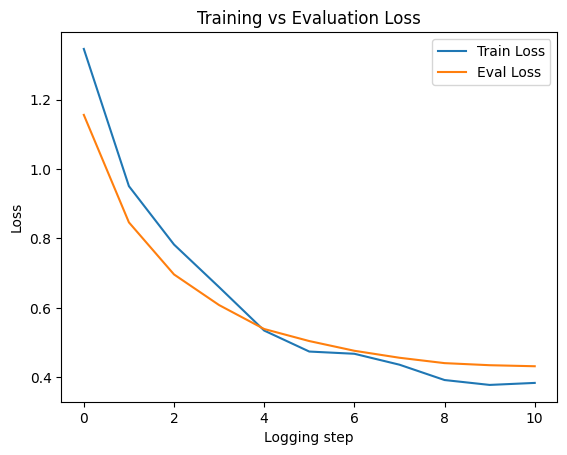

In [ ]:
import matplotlib.pyplot as plt

logs = trainer.state.log_history
train_losses = [x["loss"] for x in logs if "loss" in x and "eval_loss" not in x]
eval_losses  = [x["eval_loss"] for x in logs if "eval_loss" in x]

print("Last train loss:", train_losses[-1] if train_losses else None)
print("Last eval  loss:", eval_losses[-1] if eval_losses else None)

plt.figure()
plt.plot(train_losses, label="Train Loss")
if eval_losses:
    plt.plot(eval_losses, label="Eval Loss")
plt.xlabel("Logging step")
plt.ylabel("Loss")
plt.title("Training vs Evaluation Loss")
plt.legend()
plt.show()


In [ ]:
!pip -q install evaluate==0.4.2 sacrebleu==2.4.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip -q install -U evaluate rouge-score bert-score nltk sacrebleu


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.5 MB/s eta 0:00:00


## colab


### Lưu adapter + tokenizer + metadata (base model & tham số)

In [ ]:
import json, os, time

BASE_MODEL = MODEL_NAME  # ví dụ "meta-llama/Meta-Llama-3.1-8B-Instruct"
OUTPUT_DIR = "/content/llama-qlora-xstk"  # đổi theo môi trường của bạn

os.makedirs(OUTPUT_DIR, exist_ok=True)

# Lưu LoRA adapter (nhẹ, đúng yêu cầu)
trainer.model.save_pretrained(OUTPUT_DIR)
tokenizer.save_pretrained(OUTPUT_DIR)

# Lưu metadata tham số train + base model
run_meta = {
    "base_model": BASE_MODEL,
    "output_dir": OUTPUT_DIR,
    "time": time.strftime("%Y-%m-%d %H:%M:%S"),
    "train_args": trainer.args.to_dict() if hasattr(trainer, "args") else None,
    "lora_config": getattr(trainer.model, "peft_config", None).__repr__() if hasattr(trainer.model, "peft_config") else None,
}

with open(os.path.join(OUTPUT_DIR, "run_meta.json"), "w", encoding="utf-8") as f:
    json.dump(run_meta, f, ensure_ascii=False, indent=2)

print("Saved adapter + tokenizer + run_meta.json to:", OUTPUT_DIR)


/usr/local/lib/python3.12/dist-packages/peft/utils/other.py:689: UserWarning: Unable to fetch remote file due to the following error 401 Client Error. (Request ID: Root=1-69666799-165b33ae7f792b364878b5cf;1c75fd72-c929-47ee-a61b-df8aa3928089)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct/resolve/main/config.json.
Access to model meta-llama/Llama-3.1-8B-Instruct is restricted. You must have access to it and be authenticated to access it. Please log in. - silently ignoring the lookup for the file config.json in meta-llama/Meta-Llama-3.1-8B-Instruct.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/utils/save_and_load.py:243: UserWarning: Could not find a config file in meta-llama/Meta-Llama-3.1-8B-Instruct - will assume that the vocabulary was not modified.
  warnings.warn(


Saved adapter + tokenizer + run_meta.json to: /content/llama-qlora-xstk


In [ ]:
import os
print(os.listdir(OUTPUT_DIR))


['tokenizer.json', 'run_meta.json', 'special_tokens_map.json', 'adapter_config.json', 'README.md', 'tokenizer_config.json', 'adapter_model.safetensors']


### Inference/Eval bằng 4-bit + LoRA


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel

BASE_MODEL = MODEL_NAME
ADAPTER_DIR = OUTPUT_DIR  # thư mục bạn vừa save

tokenizer = AutoTokenizer.from_pretrained(ADAPTER_DIR, use_fast=True)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

base = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    device_map="cuda:0",
    torch_dtype=torch.float16,
)

model = PeftModel.from_pretrained(base, ADAPTER_DIR)
model.eval()

def build_prompt(instruction, problem):
    # chỉnh template theo data của bạn
    return f"Instruction: {instruction}\nInput: {problem}\nResponse:"

@torch.inference_mode()
def generate_one(prompt, max_new_tokens=256, do_sample=False, temperature=0.7, top_p=0.9):
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048).to("cuda")
    gen_kwargs = dict(max_new_tokens=max_new_tokens, do_sample=do_sample)
    if do_sample:
        gen_kwargs.update(dict(temperature=temperature, top_p=top_p))
    out = model.generate(**inputs, **gen_kwargs)
    text = tokenizer.decode(out[0], skip_special_tokens=True)
    return text


### Evaluate metrics: BLEU / ROUGE / METEOR / BERTScore

In [ ]:
# sau khi save xong
del trainer
try:
    del model
    del base
except:
    pass
import gc, torch
gc.collect()
torch.cuda.empty_cache()


In [ ]:
import re
from tqdm.auto import tqdm
import torch

SPLIT = "test"
N = 5
MAX_INPUT_LEN = 512
MAX_NEW_TOKENS = 64

def build_prompt(ex):
    return f"""### Instruction:
{ex["instruction"]}

### Problem:
{ex["problem"]}

### Answer:
"""

def extract_answer(text):
    if "### Answer:" in text:
        text = text.split("### Answer:", 1)[-1]
    text = re.split(r"\n###\s+", text, maxsplit=1)[0]
    return text.strip()

@torch.inference_mode()
def generate_one(prompt):
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=MAX_INPUT_LEN)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    out = model.generate(
        **inputs,
        max_new_tokens=MAX_NEW_TOKENS,
        do_sample=False,
        pad_token_id=tokenizer.eos_token_id,
        use_cache=False,  # T4 an toàn hơn
    )
    return tokenizer.decode(out[0], skip_special_tokens=True)

rows = dataset[SPLIT].select(range(min(N, len(dataset[SPLIT]))))
preds, refs = [], []

for ex in tqdm(rows, desc="Generating"):
    prompt = build_prompt(ex)
    full = generate_one(prompt)
    preds.append(extract_answer(full))
    refs.append(ex["target"].strip())

print("len(preds) =", len(preds), "len(refs) =", len(refs))
print("pred sample:", preds[0][:200])
print("ref  sample:", refs[0][:200])


Generating:   0%|          | 0/5 [00:00<?, ?it/s]

NameError: name 'model' is not defined

### biểu đồ

In [ ]:
import matplotlib.pyplot as plt

# chọn các metrics muốn show
plot_keys = ["bleu", "meteor", "rouge1", "rouge2", "rougeL", "bertscore_f1"]
vals = [results[k] for k in plot_keys]

plt.figure(figsize=(10, 4))
plt.bar(plot_keys, vals)
plt.xticks(rotation=30, ha="right")
plt.ylabel("Score")
plt.title(f"Evaluation metrics ({SPLIT})")
plt.tight_layout()
plt.show()


NameError: name 'results' is not defined

## test random


In [ ]:

import sacrebleu
from transformers import pipeline

def build_prompt(ex):
    return f"""### Instruction:
{ex['instruction']}

### Problem:
{ex['problem']}

### Answer:
"""

@torch.inference_mode()
def generate_answer(prompt, max_new_tokens=256):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    out = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        temperature=0.0,
        pad_token_id=tokenizer.eos_token_id
    )
    text = tokenizer.decode(out[0], skip_special_tokens=True)
    pred = text.split("### Answer:")[-1].strip()
    return pred

model.eval()

hyps, refs = [], []
for ex in dataset["test"]:
    prompt = build_prompt(ex)
    pred = generate_answer(prompt, max_new_tokens=256)
    hyps.append(pred)
    refs.append(ex["target"].strip())

bleu = sacrebleu.corpus_bleu(hyps, [refs])
print("BLEU:", bleu.score)



/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:606: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)
/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sampl

KeyboardInterrupt: 

In [ ]:
import random

print("\n=== Sample qualitative tests ===")
for ex in random.sample(list(dataset["test"]), 3):
    prompt = build_prompt(ex)
    pred = generate_answer(prompt, max_new_tokens=256)

    print("PROBLEM:\n", ex["problem"][:400])
    print("\nREF:\n", ex["target"][:300])
    print("\nPRED:\n", pred[:300])
    print("="*90)
